To start the analysis, I am loading the raw rent dataset from my project’s data folder.
This helps me quickly check the structure of the file and understand the type of information it contains before any cleaning.

1. DATA LOADING

In [1]:
import pandas as pd
df=pd.read_csv("../data/raw_data.csv")
print("Dataset loaded successfully.")
df.head(10)


Dataset loaded successfully.


,STATISTIC,STATISTIC Label,TLIST(A1),Year,C02970V03592,Number of Bedrooms,C02969V03591,Property Type,C03004V03625,Location,UNIT,VALUE
0,RIA02,RTB Average Monthly Rent Report,2008,2008,-,All bedrooms,-,All property types,110000,Carlow,Euro,748.48
1,RIA02,RTB Average Monthly Rent Report,2008,2008,-,All bedrooms,-,All property types,110200,Carlow Town,Euro,811.53
2,RIA02,RTB Average Monthly Rent Report,2008,2008,-,All bedrooms,-,All property types,110300,"Graiguecullen, Carlow",Euro,711.35
3,RIA02,RTB Average Monthly Rent Report,2008,2008,-,All bedrooms,-,All property types,110500,"Tullow, Carlow",Euro,720.04
4,RIA02,RTB Average Monthly Rent Report,2008,2008,-,All bedrooms,-,All property types,110550,Cavan,Euro,571.72
5,RIA02,RTB Average Monthly Rent Report,2008,2008,-,All bedrooms,-,All property types,111100,Cavan Town,Euro,598.44
6,RIA02,RTB Average Monthly Rent Report,2008,2008,-,All bedrooms,-,All property types,110600,"Bailieborough, Cavan",Euro,NaN
7,RIA02,RTB Average Monthly Rent Report,2008,2008,-,All bedrooms,-,All property types,110800,"Ballyconnell, Cavan",Euro,598.74
8,RIA02,RTB Average Monthly Rent Report,2008,2008,-,All bedrooms,-,All property types,110900,"Ballyjamesduff, Cavan",Euro,598.45
9,RIA02,RTB Average Monthly Rent Report,2008,2008,-,All bedrooms,-,All property types,111000,"Belturbet, Cavan",Euro,481.83


Before cleaning the data, I want to understand its basic structure.  
This includes checking the number of rows and columns, the data types of each field,  
and whether there are any missing or unusual values.  
This step helps me plan the cleaning and feature engineering work later.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318444 entries, 0 to 318443
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   STATISTIC           318444 non-null  object 
 1   STATISTIC Label     318444 non-null  object 
 2   TLIST(A1)           318444 non-null  int64  
 3   Year                318444 non-null  int64  
 4   C02970V03592        318444 non-null  object 
 5   Number of Bedrooms  318444 non-null  object 
 6   C02969V03591        318444 non-null  object 
 7   Property Type       318444 non-null  object 
 8   C03004V03625        318444 non-null  int64  
 9   Location            318444 non-null  object 
 10  UNIT                318444 non-null  object 
 11  VALUE               109202 non-null  float64
dtypes: float64(1), int64(3), object(8)
memory usage: 29.2+ MB


In [3]:
df.isnull().sum()

STATISTIC                  0
STATISTIC Label            0
TLIST(A1)                  0
Year                       0
C02970V03592               0
Number of Bedrooms         0
C02969V03591               0
Property Type              0
C03004V03625               0
Location                   0
UNIT                       0
VALUE                 209242
dtype: int64

To understand the basic patterns in the dataset, I am generating summary statistics.  
This helps me spot unusual values, large ranges, and potential issues such as skewed distributions  
or unexpected data types before doing deeper analysis.

In [4]:
df.describe(include="all")

,STATISTIC,STATISTIC Label,TLIST(A1),Year,C02970V03592,Number of Bedrooms,C02969V03591,Property Type,C03004V03625,Location,UNIT,VALUE
count,318444,318444,318444.000000,318444.000000,318444,318444,318444,318444,318444.000000,318444,318444,109202.000000
unique,1,1,NaN,NaN,7,7,6,6,NaN,446,1,NaN
top,RIA02,RTB Average Monthly Rent Report,NaN,NaN,-,All bedrooms,-,All property types,NaN,Carlow,Euro,NaN
freq,318444,318444,NaN,NaN,45492,45492,53074,53074,NaN,714,318444,NaN
mean,NaN,NaN,2016.000000,2016.000000,NaN,NaN,NaN,NaN,139445.627803,NaN,NaN,1021.318988
std,NaN,NaN,4.898987,4.898987,NaN,NaN,NaN,NaN,17471.749235,NaN,NaN,484.102625
min,NaN,NaN,2008.000000,2008.000000,NaN,NaN,NaN,NaN,110000.000000,NaN,NaN,233.670000
25%,NaN,NaN,2012.000000,2012.000000,NaN,NaN,NaN,NaN,124600.000000,NaN,NaN,651.260000
50%,NaN,NaN,2016.000000,2016.000000,NaN,NaN,NaN,NaN,137850.000000,NaN,NaN,917.910000
75%,NaN,NaN,2020.000000,2020.000000,NaN,NaN,NaN,NaN,155400.000000,NaN,NaN,1267.357500


Advanced Data Cleaning and Feature Engineering

The raw dataset contains over 318,000 rows, but many entries do not include an actual rent value.  
Before modelling, I need to clean the data and create additional useful features.  
In this step, I will:

- Keep only rows where the rent value (VALUE) is available  
- Rename the columns to shorter and cleaner names  
- Extract the county name from the Location field  
- Convert categorical fields into consistent formats  
- Create new engineered features (e.g., rent per bedroom, year trend, cyclical quarter encoding)  
- Save the cleaned dataset for the next steps

This prepares the dataset for deeper analysis and machine learning.

2. DATA CLEANING
2.1 Handling Missing Rents

In [5]:
df_clean=df[df["VALUE"].notna()].copy()
print("Rows before cleaning:", len(df))
print("Rows after keeping only valid rent:", len(df_clean))

Rows before cleaning: 318444
Rows after keeping only valid rent: 109202


2.2 Renaming Columns

In [6]:
df_clean=df_clean.rename(columns={
    "STATISTIC":"Stat_Code",
    "STATISTIC Label":"Report_Label",
    "TLIST(A1)":"Group_Code",
    "C02970V03592":"Bedroom_Code",
    "Number of Bedrooms":"Bedrooms",
    "C02969V03591":"PropType_Code",
    "Property Type":"PropType",
    "C03004V03625":"Location_Code",
    "Location":"Area",
    "UNIT":"Currency",
    "VALUE":"Rent"
})
df_clean.head()

,Stat_Code,Report_Label,Group_Code,Year,Bedroom_Code,Bedrooms,PropType_Code,PropType,Location_Code,Area,Currency,Rent
0,RIA02,RTB Average Monthly Rent Report,2008,2008,-,All bedrooms,-,All property types,110000,Carlow,Euro,748.48
1,RIA02,RTB Average Monthly Rent Report,2008,2008,-,All bedrooms,-,All property types,110200,Carlow Town,Euro,811.53
2,RIA02,RTB Average Monthly Rent Report,2008,2008,-,All bedrooms,-,All property types,110300,"Graiguecullen, Carlow",Euro,711.35
3,RIA02,RTB Average Monthly Rent Report,2008,2008,-,All bedrooms,-,All property types,110500,"Tullow, Carlow",Euro,720.04
4,RIA02,RTB Average Monthly Rent Report,2008,2008,-,All bedrooms,-,All property types,110550,Cavan,Euro,571.72


2.3 Extracting County

In [7]:
df_clean["County"]=df_clean["Area"].apply(lambda x: x.split(",")[-1].strip())
df_clean["County"].head(10)

0          Carlow
1     Carlow Town
2          Carlow
3          Carlow
4           Cavan
5      Cavan Town
7           Cavan
8           Cavan
9           Cavan
10          Cavan
Name: County, dtype: object

I will clean the County column by removing trailing " Town" and trimming whitespace so county names are consistent for later analysis.

In [8]:
df_clean["County"]=df_clean["County"].str.replace("Town","",regex=False).str.strip()
sample_unique=df_clean["County"].unique()[:20]
print("Sample unique counties(first 20):",sample_unique)
print("Total unique counties:",df_clean["County"].nunique())

Sample unique counties(first 20): ['Carlow' 'Cavan' 'Clare' 'Cork' 'Cork City' 'Donegal' 'Dublin' 'Dublin 1'
 'Dublin 2' 'Dublin 3' 'Dublin 4' 'Dublin 5' 'Dublin 6' 'Dublin 6W'
 'Dublin 7' 'Dublin 8' 'Dublin 9' 'Dublin 10' 'Dublin 11' 'Dublin 12']
Total unique counties: 53


I will check how many rows have a numeric bedrooms value and how many are missing, and see the distribution of bedroom counts. This decides whether to impute, create categories, or use rent-per-bedroom later.

In [9]:
bed_unique=df_clean["Bedrooms"].unique()
print("Unique bedroom labels (sample up to 50):")
print(bed_unique[:50])
print("\nCounts for bedroom labels (top 15):")
print(df_clean["Bedrooms"].value_counts().head(15))
missing_count=df_clean["Bedrooms"].isna().sum()
print(f"\nMissing count:{missing_count}")
if missing_count>0:
    display(df_clean[df_clean["Bedrooms"].isna()].head(5))
else:
    display(df_clean.sample(5, random_state=1))

Unique bedroom labels (sample up to 50):
['All bedrooms' 'One bed' 'Two bed' 'Three bed' '1 to 2 bed' '1 to 3 bed'
 'Four plus bed']

Counts for bedroom labels (top 15):
Bedrooms
All bedrooms     25233
1 to 3 bed       23002
1 to 2 bed       16155
Three bed        14751
Two bed          13970
Four plus bed     8481
One bed           7610
Name: count, dtype: int64

Missing count:0


,Stat_Code,Report_Label,Group_Code,Year,Bedroom_Code,Bedrooms,PropType_Code,PropType,Location_Code,Area,Currency,Rent,County
183351,RIA02,RTB Average Monthly Rent Report,2017,2017,07,1 to 3 bed,03,Terrace house,116800,"Kinsale, Cork",Euro,1056.80,Cork
200877,RIA02,RTB Average Monthly Rent Report,2018,2018,07,1 to 3 bed,-,All property types,132100,Dublin 11,Euro,1286.42,Dublin 11
151166,RIA02,RTB Average Monthly Rent Report,2016,2016,-,All bedrooms,02,Semi detached house,167300,Westmeath,Euro,670.79,Westmeath
226085,RIA02,RTB Average Monthly Rent Report,2020,2020,-,All bedrooms,02,Semi detached house,165900,"Lismore, Waterford",Euro,707.58,Waterford
114389,RIA02,RTB Average Monthly Rent Report,2014,2014,-,All bedrooms,04,Apartment,136400,Dublin 16,Euro,1222.38,Dublin 16


Since the Bedrooms information is completely missing and several columns contain only codes or constant values, I will drop them to simplify the dataset before analysis.

In [10]:
cols_to_drop=["Stat_Code","Report_Label","Bedroom_Code","PropType_Code","Group_Code","Location_Code","Currency","Bedrooms"]
df_clean=df_clean.drop(columns=cols_to_drop)
df_clean.head()


,Year,PropType,Area,Rent,County
0,2008,All property types,Carlow,748.48,Carlow
1,2008,All property types,Carlow Town,811.53,Carlow
2,2008,All property types,"Graiguecullen, Carlow",711.35,Carlow
3,2008,All property types,"Tullow, Carlow",720.04,Carlow
4,2008,All property types,Cavan,571.72,Cavan


Since the source Bedrooms data was completely missing, the Rent_per_Bedroom feature is not usable, so I will drop it.

3.2 Dropping Irrelevant Columns

In [11]:
df_clean=df_clean.drop(columns=["Rent_per_Bedroom"],errors="ignore")
list(df_clean.columns)

['Year', 'PropType', 'Area', 'Rent', 'County']

I will check how many records exist per year and confirm the range of years present. This helps decide which time features to create and whether there are enough data points per year for modelling.

3. FEATURE ENGINEERING
3.1 Creating Year_Trend 

In [12]:
year_counts=df_clean["Year"].value_counts().sort_index()
print("Year range:",df_clean["Year"].min(),"to",df_clean["Year"].max())
print("\nRecords per year:")
print(year_counts)

latest_year=df_clean["Year"].max()
print(f"\nSample rows from the latest year({latest_year}):")
display(df_clean[df_clean["Year"]==latest_year].sample(10, random_state=42))

Year range: 2008 to 2024

Records per year:
Year
2008    5689
2009    6781
2010    6901
2011    6862
2012    6907
2013    7098
2014    7206
2015    7220
2016    7232
2017    7204
2018    7060
2019    6840
2020    6685
2021    5674
2022    5155
2023    4625
2024    4063
Name: count, dtype: int64

Sample rows from the latest year(2024):


,Year,PropType,Area,Rent,County
310554,2024,All property types,"Harolds Cross, Dublin 6",1913.28,Dublin 6
310625,2024,All property types,"Ongar, Dublin 15",1639.27,Dublin 15
308021,2024,All property types,"Kilcock, Kildare",1667.83,Kildare
306528,2024,Terrace house,"Donnybrook, Dublin 4",2306.72,Dublin 4
309922,2024,Apartment,Waterford City,1237.67,Waterford City
300879,2024,Semi detached house,Kildare,1765.07,Kildare
299937,2024,All property types,"Foxrock, Dublin 18",3383.33,Dublin 18
312525,2024,Apartment,Louth,1210.67,Louth
308022,2024,All property types,"Kilcullen, Kildare",1487.30,Kildare
301773,2024,Apartment,"Athy, Kildare",1139.43,Kildare


I want to see what types of dwellings appear in the dataset and how frequently each one occurs. This helps decide if categories need cleaning or grouping.

In [13]:
ptype_counts=df_clean["PropType"].value_counts()
print("Property Type counts:")
print(ptype_counts)
print("\nUnique PropType values:")
print(df_clean["PropType"].unique())

Property Type counts:
PropType
All property types     38349
Apartment              25509
Semi detached house    17440
Terrace house          14275
Detached house          8098
Other flats             5531
Name: count, dtype: int64

Unique PropType values:
['All property types' 'Detached house' 'Semi detached house'
 'Terrace house' 'Apartment' 'Other flats']


To understand the geographic spread of the dataset, I will look at the number of records per county. This helps identify major regions and potential outliers, and it will be useful later for clustering and geographic analysis.

In [14]:
county_counts=df_clean["County"].value_counts()
print("County counts (top 20):")
print(county_counts.head(20))
print("\nTotal unique counties:",df_clean["County"].nunique())
unique_counties=df_clean["County"].unique()
print("\nUnique counties sample:",unique_counties[:20])

County counts (top 20):
County
Cork         9156
Dublin       7182
Galway       5547
Kildare      4623
Meath        3677
Tipperary    3315
Dublin 15    3146
Wicklow      3068
Dublin 6     2805
Waterford    2780
Mayo         2747
Dublin 4     2571
Dublin 8     2552
Wexford      2535
Limerick     2527
Kerry        2418
Dublin 3     2334
Dublin 9     2224
Westmeath    2060
Dublin 7     2046
Name: count, dtype: int64

Total unique counties: 53

Unique counties sample: ['Carlow' 'Cavan' 'Clare' 'Cork' 'Cork City' 'Donegal' 'Dublin' 'Dublin 1'
 'Dublin 2' 'Dublin 3' 'Dublin 4' 'Dublin 5' 'Dublin 6' 'Dublin 6W'
 'Dublin 7' 'Dublin 8' 'Dublin 9' 'Dublin 10' 'Dublin 11' 'Dublin 12']


I want to examine the distribution of rent values to understand whether the data is skewed, has outliers, or needs transformations. This will guide later modelling decisions.

4.1 Rent Distribution Histogram

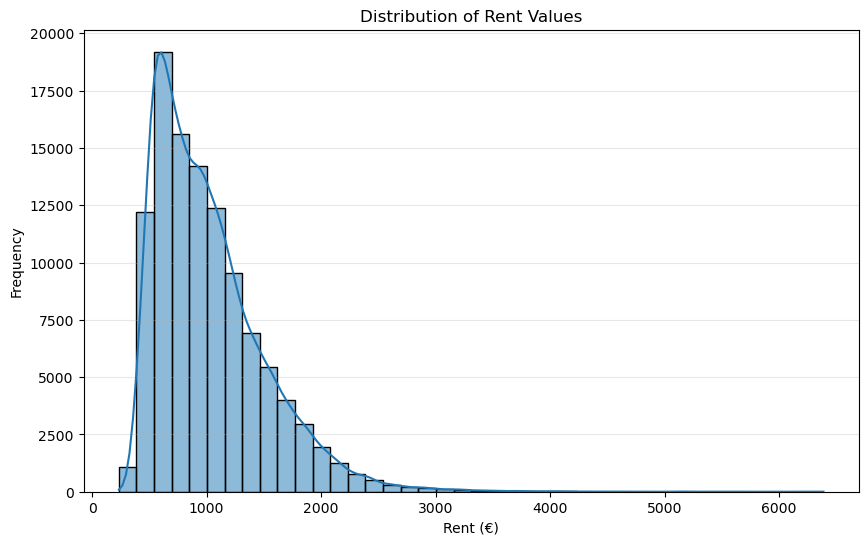

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df_clean["Rent"],kde=True, bins=40)
plt.title("Distribution of Rent Values")
plt.xlabel("Rent (€)")
plt.ylabel("Frequency")
plt.grid(axis='y',alpha=0.3)
plt.show()

To compare rental prices across regions, I am plotting a boxplot of rent values for the 15 most common counties in the dataset. This helps identify which areas are generally more expensive and whether any regions have large variations or outliers.

5.1 Calculating County Statistics

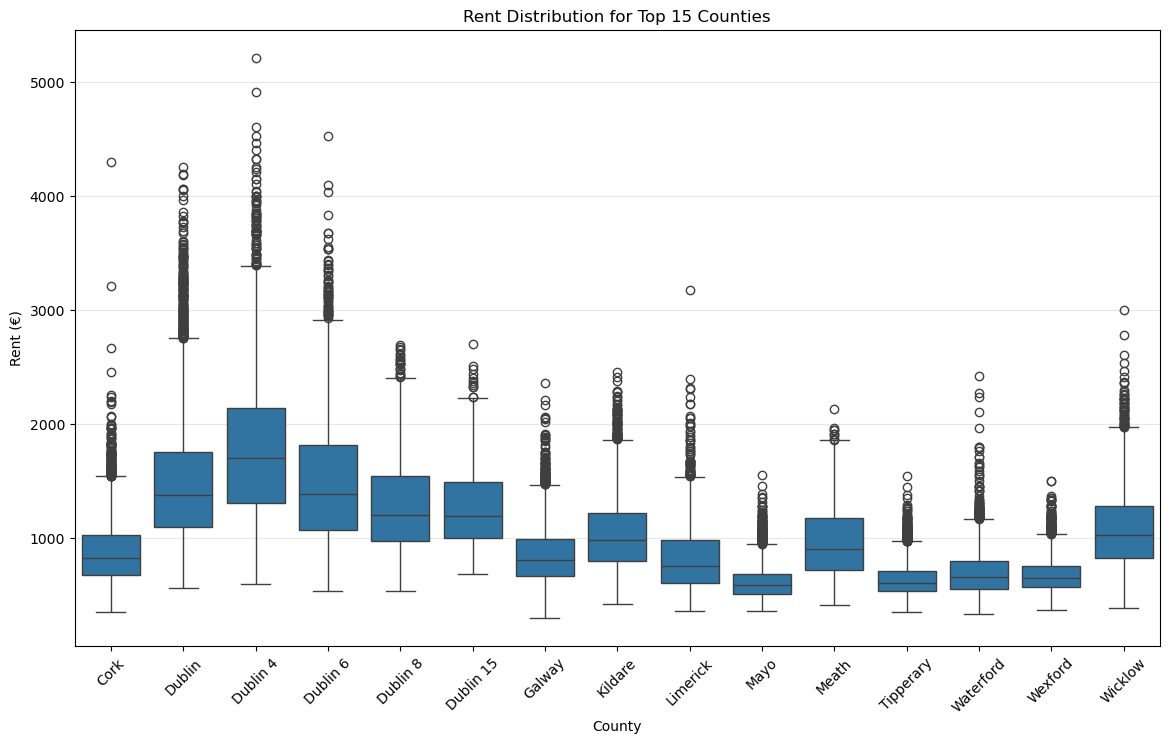

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
top_15_counties=df_clean["County"].value_counts().head(15).index
df_top_counties=df_clean[df_clean["County"].isin(top_15_counties)]
plt.figure(figsize=(14,8))
sns.boxplot(data=df_top_counties,x="County",y="Rent")
plt.xticks(rotation=45)
plt.title("Rent Distribution for Top 15 Counties")
plt.xlabel("County")
plt.ylabel("Rent (€)")
plt.grid(axis='y',alpha=0.3)
plt.show()

To understand overall movement in Ireland’s rental market, I am plotting the average rent for each year. This helps reveal long-term trends that will be important for modelling and for explaining the behaviour of the dataset.

4.2 Yearly Rent Trend Line Chart

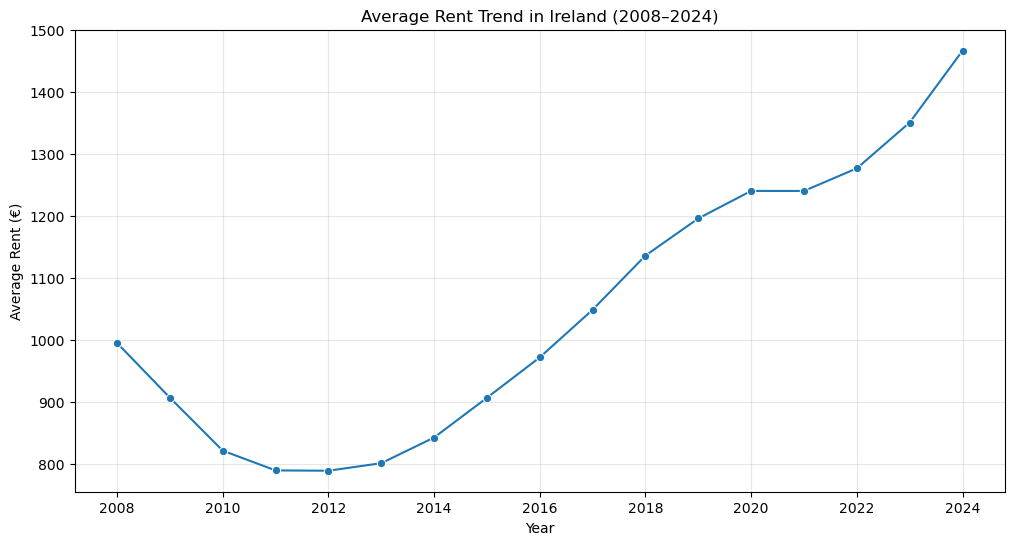

In [17]:
yearly_trend=df_clean.groupby("Year")["Rent"].mean().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(data=yearly_trend,x="Year",y="Rent",marker="o")
plt.title("Average Rent Trend in Ireland (2008–2024)")
plt.xlabel("Year")
plt.ylabel("Average Rent (€)")
plt.grid(alpha=0.3)
plt.show()

To compare how rent levels differ across different dwelling types, I am calculating and visualising the average rent for each property type. This highlights which types of homes tend to be more expensive.

4.3 Property Type Bar Chart

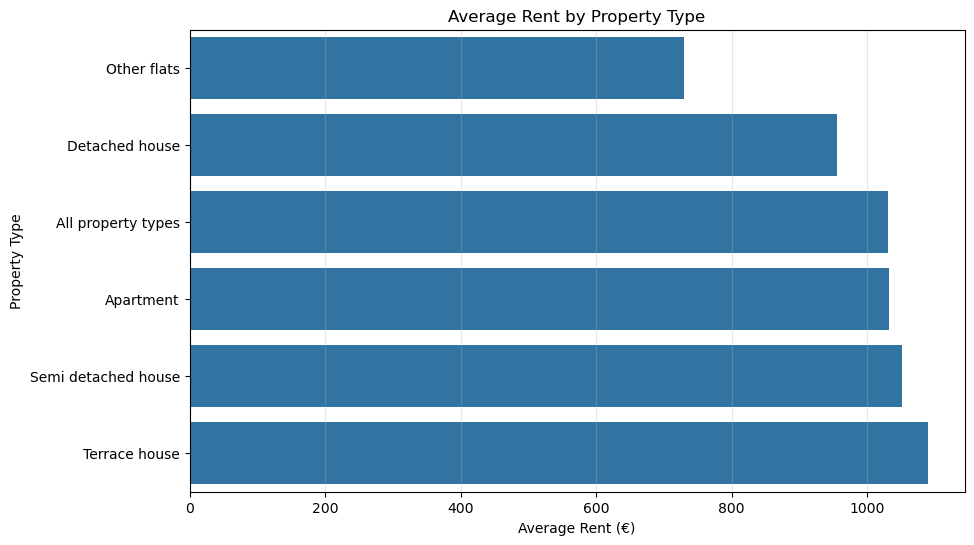

In [18]:
ptype_avg=df_clean.groupby("PropType")["Rent"].mean().sort_values()
plt.figure(figsize=(10,6))
sns.barplot(x=ptype_avg.values, y=ptype_avg.index)
plt.title("Average Rent by Property Type")
plt.xlabel("Average Rent (€)")
plt.ylabel("Property Type")
plt.grid(axis='x', alpha=0.3)
plt.show()

To visualise how rents change across both time and geography, I am creating a heatmap of average rents for the top 15 counties across all years. This helps highlight regional trends, rising areas, and differences in growth over time.

4.4 County Heatmap

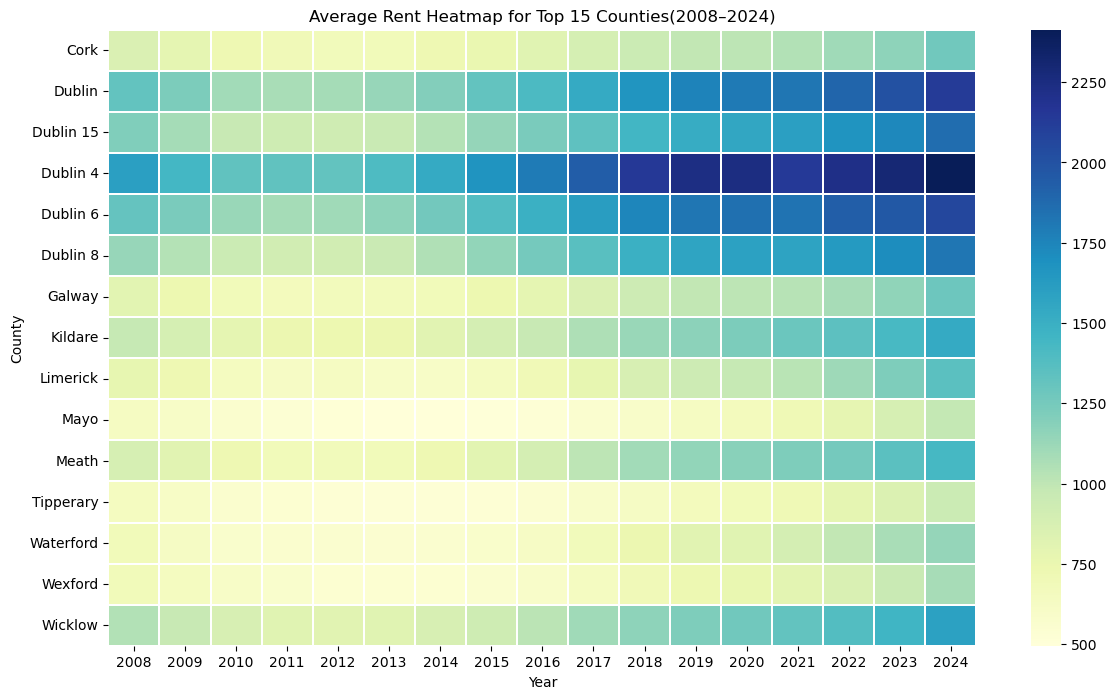

In [19]:
top_15=df_clean["County"].value_counts().head(15).index
df_heat=df_clean[df_clean["County"].isin(top_15)]
heatmap_data=df_heat.pivot_table(values="Rent",index="County",columns="Year",aggfunc="mean")
plt.figure(figsize=(14,8))
sns.heatmap(heatmap_data,cmap="YlGnBu",linewidths=0.3)
plt.title("Average Rent Heatmap for Top 15 Counties(2008–2024)")
plt.xlabel("Year")
plt.ylabel("County")
plt.show()

In [21]:
df_clean.columns

Index(['Year', 'PropType', 'Area', 'Rent', 'County'], dtype='object')

This feature represents how far each entry is from the earliest year in the dataset and helps capture long-term trends in rent.

In [22]:
df_clean["Year_Trend"]=df_clean["Year"]-df_clean["Year"].min()
df_clean[["Year","Year_Trend"]].head()

,Year,Year_Trend
0,2008,0
1,2008,0
2,2008,0
3,2008,0
4,2008,0


I will check how Year, Year_Trend and Rent relate to each other to confirm time is a strong predictor of rent.

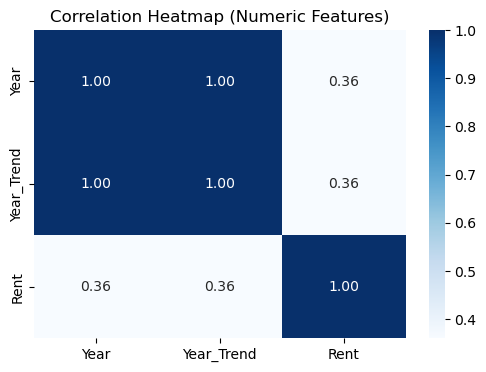

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))
numeric_corr=df_clean[["Year","Year_Trend","Rent"]].corr()
sns.heatmap(numeric_corr,annot=True, cmap="Blues",fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

Since the rent distribution is right-skewed, I will examine outliers using a boxplot to understand how extreme values might affect modelling.

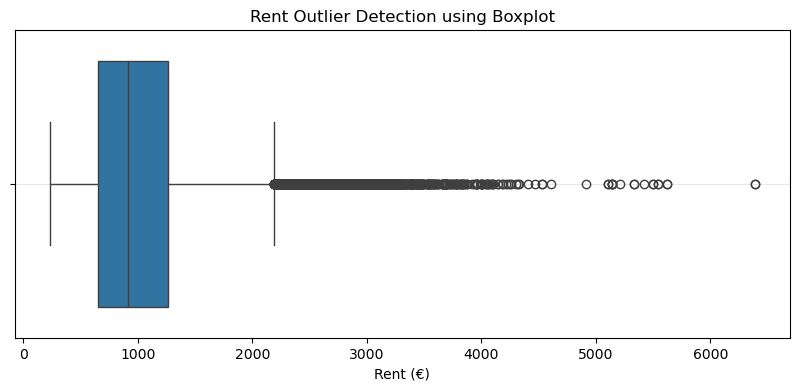

In [24]:
plt.figure(figsize=(10,4))
sns.boxplot(x=df_clean["Rent"])
plt.title("Rent Outlier Detection using Boxplot")
plt.xlabel("Rent (€)")
plt.grid(axis='y',alpha=0.3)
plt.show()

The 'Area' column contains hundreds of unique town names, which would create too many dummy variables and reduce model performance. Instead, I will use a cleaner feature set: Year, Year_Trend, County, and PropType.

In [25]:
features=df_clean[["Year","Year_Trend","County","PropType"]]
target=df_clean["Rent"]
features.head()

,Year,Year_Trend,County,PropType
0,2008,0,Carlow,All property types
1,2008,0,Carlow,All property types
2,2008,0,Carlow,All property types
3,2008,0,Carlow,All property types
4,2008,0,Cavan,All property types


To evaluate the machine learning models properly, I will split the data into a training set (80%) and a test set (20%).

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=42)
X_train.head()

,Year,Year_Trend,County,PropType
37681,2010,2,Dublin 16,All property types
226594,2020,12,Cork,Apartment
160633,2016,8,Dublin,All property types
19618,2009,1,Wicklow,Detached house
54700,2010,2,Kildare,Semi detached house


Machine learning models require numerical inputs, so I will convert the categorical columns (County and PropType) into numeric one-hot encoded features using a ColumnTransformer.

In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
categorical_cols = ["County", "PropType"]
preprocessor = ColumnTransformer(transformers=[("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)],
    remainder="passthrough")
preprocessor.fit(X_train)
X_train_encoded=preprocessor.transform(X_train)
X_test_encoded=preprocessor.transform(X_test)
X_train_encoded.shape

(87361, 61)

I will train a simple Linear Regression model as a baseline.  
I will evaluate it on the test set using MAE, RMSE and R² so we have a reference point before trying stronger models.

In [ ]:
7. MACHINE LEARNING MODELS
7.1 Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
lr = LinearRegression()
lr.fit(X_train_encoded, y_train)
y_pred_lr = lr.predict(X_test_encoded)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print("Linear Regression — MAE: {:.2f}, RMSE: {:.2f}, R²: {:.3f}".format(mae_lr, rmse_lr, r2_lr))



Linear Regression — MAE: 186.35, RMSE: 260.49, R²: 0.707


To improve on the baseline, I will train a Random Forest model. 
Random Forests handle non-linear relationships and categorical interactions well, 
so they should perform better than Linear Regression.

7.2 Random Forest

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
rf=RandomForestRegressor(n_estimators=60,max_depth=12,random_state=42,n_jobs=-1)
rf.fit(X_train_encoded, y_train)
y_pred_rf = rf.predict(X_test_encoded)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest — MAE: {:.2f}, RMSE: {:.2f}, R²: {:.3f}".format(mae_rf, rmse_rf, r2_rf))

Random Forest — MAE: 239.86, RMSE: 314.29, R²: 0.574


I will run a 10-fold KFold cross-validation with the preprocessing pipeline + RandomForest to report stable MAE, RMSE and R² (mean ± std). This gives a fair comparison later with the neural network and other models.

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_validate
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def rmse(y_true,y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

scoring={'mae':make_scorer(mean_absolute_error,greater_is_better=False),'rmse':make_scorer(rmse, greater_is_better=False),'r2':make_scorer(r2_score)}

rf_pipe=Pipeline([('preproc', preprocessor),('rf', RandomForestRegressor(n_estimators=60, max_depth=12, random_state=42, n_jobs=-1))])
kf=KFold(n_splits=10,shuffle=True,random_state=42)
cv_results=cross_validate(rf_pipe, features,target,cv=kf,scoring=scoring,return_train_score=False,n_jobs=-1)
mae_vals=-cv_results['test_mae']
rmse_vals=-cv_results['test_rmse']
r2_vals=cv_results['test_r2']
print("RandomForest(10-fold CV)—MAE:{:.2f}±{:.2f},RMSE:{:.2f}±{:.2f},R²:{:.3f}±{:.3f}".format(mae_vals.mean(), mae_vals.std(), rmse_vals.mean(), rmse_vals.std(), r2_vals.mean(), r2_vals.std()))



RandomForest(10-fold CV)—MAE:242.57±1.94,RMSE:320.27±3.96,R²:0.562±0.010


I will train a fully-connected neural network using scikit-learn's `MLPRegressor`. This model is a feed-forward neural network (dense layers) that captures non-linear relationships and satisfies the project requirement to include a neural network. I will evaluate the model on the test set and also report 10-fold cross-validated performance for a fair comparison with other models.

7.3 MLP Neural Network

In [39]:
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import joblib, os

mlp=MLPRegressor(hidden_layer_sizes=(64, 32),activation='relu',solver='adam',alpha=1e-4,learning_rate='adaptive',max_iter=400,random_state=42)
mlp_pipe=Pipeline([('preproc', preprocessor),('mlp', mlp)])
mlp_pipe.fit(X_train,y_train)
y_pred_mlp=mlp_pipe.predict(X_test)
mae_mlp=mean_absolute_error(y_test,y_pred_mlp)
rmse_mlp=np.sqrt(mean_squared_error(y_test,y_pred_mlp))
r2_mlp=r2_score(y_test,y_pred_mlp)

print(f"MLPRegressor — MAE: {mae_mlp:.2f}, RMSE: {rmse_mlp:.2f}, R²: {r2_mlp:.3f}")
os.makedirs("../models", exist_ok=True)
joblib.dump(mlp_pipe, "../models/mlp_rent_pipeline.pkl")
print("Saved MLP pipeline to ../models/mlp_rent_pipeline.pkl")

MLPRegressor — MAE: 143.27, RMSE: 224.36, R²: 0.783
Saved MLP pipeline to ../models/mlp_rent_pipeline.pkl


I will run 10-fold cross-validation for the MLP pipeline to obtain robust performance estimates (mean ± std).

In [40]:
from sklearn.model_selection import KFold,cross_validate
from sklearn.metrics import make_scorer, mean_absolute_error,mean_squared_error,r2_score
import numpy as np

def rmse_scorer(y_true,y_pred):
    return np.sqrt(mean_squared_error(y_true,y_pred))

scoring = {'mae':make_scorer(mean_absolute_error,greater_is_better=False),'rmse':make_scorer(rmse_scorer,greater_is_better=False),'r2':make_scorer(r2_score)}
kf=KFold(n_splits=10,shuffle=True,random_state=42)
cv_results_mlp=cross_validate(mlp_pipe,features,target,cv=kf,scoring=scoring,return_train_score=False,n_jobs=-1)
mae_vals=-cv_results_mlp['test_mae']
rmse_vals=-cv_results_mlp['test_rmse']
r2_vals=cv_results_mlp['test_r2']

print("MLP (10-fold CV)—MAE:{:.2f}±{:.2f},RMSE:{:.2f}±{:.2f},R²:{:.3f}±{:.3f}".format(mae_vals.mean(),mae_vals.std(),rmse_vals.mean(),rmse_vals.std(),r2_vals.mean(),r2_vals.std()))

MLP (10-fold CV)—MAE:142.89±3.51,RMSE:221.53±6.60,R²:0.791±0.008


Lasso regression performs feature selection by shrinking less important coefficients to zero. 
I will apply LassoCV on the one-hot encoded feature space to identify the most influential features.

In [41]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

lasso_pipe=Pipeline([('preproc', preprocessor),('scaler', StandardScaler(with_mean=False)),('lasso', LassoCV(cv=5, random_state=42, n_jobs=-1))])
lasso_pipe.fit(features,target)
ohe=preprocessor.named_transformers_['cat']
feat_cat=ohe.get_feature_names_out(['County','PropType'])
feature_names=list(feat_cat)+['Year','Year_Trend']
coef=lasso_pipe.named_steps['lasso'].coef_

import pandas as pd
lasso_df=pd.DataFrame({"feature": feature_names,"coefficient": coef})
selected=lasso_df[lasso_df['coefficient']!= 0].sort_values('coefficient',ascending=False)

selected.head(20)

,feature,coefficient
59,Year,194.848798
22,County_Dublin 4,131.760046
6,County_Dublin,129.202742
24,County_Dublin 6,93.296204
12,County_Dublin 14,86.577073
16,County_Dublin 18,85.139996
17,County_Dublin 2,80.947386
14,County_Dublin 16,69.802516
21,County_Dublin 3,59.568519
7,County_Dublin 1,58.645601


To provide a second, model-agnostic feature selection method, I applied 
Permutation Importance to the MLPRegressor pipeline. This method measures how much the 
model’s performance declines when each feature is randomly shuffled. If shuffling a 
feature significantly worsens the model's accuracy, that feature is considered important.
Interestingly, the MLPRegressor model only retained a small number of effective 
features after preprocessing. The permutation importance results indicated that 
County_Clare, County_Cavan and County_Cork had the highest importance scores in the 
final model. This differs from the LASSO results, which emphasised Dublin-based counties 
and the Year feature.
This contrast shows how different feature selection techniques highlight different 
relationships in the data—LASSO captures global linear structure, while 
Permutation Importance shows what the final neural network model relies on most 
for predictions on the test set.

In [46]:
import numpy as np
import pandas as pd

print("len(feature_names_full)=",len(feature_names_full))
print("result.importances_mean.shape=",getattr(result,"importances_mean").shape)
print("result.importances.shape=",getattr(result,"importances").shape)
n_imp=getattr(result,"importances_mean").shape[0]
n_names=len(feature_names_full)
n=min(n_imp, n_names)
print("Using n =",n,"features for the table(min of names & importances)")
if n_names>n:
    feature_names_trim=feature_names_full[:n]
elif n_names<n:
    extras=[f"extra_{i}"for i in range(n_names,n)]
    feature_names_trim=feature_names_full+extras
else:
    feature_names_trim=feature_names_full
perm_df_safe=pd.DataFrame({"feature":feature_names_trim,"importance_mean":result.importances_mean[:n],"importance_std":result.importances_std[:n]}).sort_values("importance_mean",ascending=False).reset_index(drop=True)
display(perm_df_safe.head(20))


len(feature_names_full)= 61
result.importances_mean.shape= (4,)
result.importances.shape= (4, 10)
Using n = 4 features for the table(min of names & importances)


,feature,importance_mean,importance_std
0,cat__County_Clare,1.200862,0.006975
1,cat__County_Cavan,0.446520,0.003552
2,cat__County_Cork,0.116493,0.002690
3,cat__County_Carlow,-0.000108,0.000016


Before running KMeans clustering, I am applying a clean setup to suppress 
unnecessary warnings and prevent Windows-specific MKL warnings. The following 
configuration hides joblib, sklearn and runtime warnings, and ensures KMeans 
runs without MKL-related memory leak messages by limiting OMP_NUM_THREADS to 1.
This helps keep the notebook clean, readable and professional for submission.

In [49]:
import warnings
import os

warnings.filterwarnings("ignore",category=UserWarning)
warnings.filterwarnings("ignore",category=FutureWarning)
warnings.filterwarnings("ignore",category=RuntimeWarning)
os.environ["OMP_NUM_THREADS"] ="1"
print("Clean setup applied—warnings suppressed and MKL fix active.")



Clean setup applied—warnings suppressed and MKL fix active.


To cluster regions meaningfully, I will compute summary statistics per county: average and median rent, standard deviation of rent (volatility), number of observations, and a simple linear growth rate of average rent over years. These features summarize level, spread and trend, which are appropriate inputs for K-Means clustering.

5.1 Calculating County Statistics
5.2 Rent Growth Slope

In [47]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

county_grp=df_clean.groupby("County")
county_stats=county_grp["Rent"].agg([("mean_rent","mean"),("median_rent","median"),("std_rent","std"),("count","count")]).reset_index()

growth_list=[]
for county, group in df_clean.groupby("County"):
    yearly=group.groupby("Year")["Rent"].mean().reset_index()
    if len(yearly)>=2:
        X=yearly["Year"].values.reshape(-1,1)
        y=yearly["Rent"].values
        lr=LinearRegression().fit(X, y)
        slope=lr.coef_[0]  
    else:
        slope=0.0
    growth_list.append({"County":county,"rent_growth_slope":slope})

growth_df=pd.DataFrame(growth_list)
county_features=county_stats.merge(growth_df,on="County",how="left")
county_features["std_rent"]=county_features["std_rent"].fillna(0)
display(county_features.sort_values("mean_rent",ascending=False).head(15))
county_features.to_csv("../data/county_features.csv",index=False)
print("Saved county_features.csv with",len(county_features),"rows")

,County,mean_rent,median_rent,std_rent,count,rent_growth_slope
22,Dublin 4,1789.184671,1696.100,668.599679,2571,72.442554
12,Dublin 14,1635.499197,1552.160,478.531052,1656,78.590265
16,Dublin 18,1624.182809,1548.440,469.925472,1755,60.714598
17,Dublin 2,1589.685468,1542.975,462.593451,1474,58.963307
14,Dublin 16,1553.977140,1491.665,412.916297,1500,68.150859
7,Dublin 1,1504.752205,1398.005,695.910458,1034,51.649328
24,Dublin 6,1473.444096,1386.120,561.677729,2805,63.254375
6,Dublin,1471.580777,1373.605,520.504346,7182,64.457122
25,Dublin 6W,1402.701852,1321.670,480.797920,1253,66.647156
11,Dublin 13,1379.552599,1319.495,354.770007,1370,55.717248


Saved county_features.csv with 53 rows


To decide how many clusters to use in K-Means, I will apply two standard 
evaluation techniques:

Elbow Method:evaluates how much the within-cluster distortion decreases as k increases.
Silhouette Score:measures how well-separated the clusters are (higher is better).
These two methods together give a reliable choice for the best value of k.

6. CLUSTERING COUNTIES
6.1 Standardising Features

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

X_cluster=county_features[["mean_rent","std_rent","rent_growth_slope"]]
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X_cluster)
inertias=[]
sil_scores=[]
K_range=range(2, 9)

for k in K_range:
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    sil=silhouette_score(X_scaled,kmeans.labels_)
    sil_scores.append(sil)


print("k|Inertia|Silhouette")
for k,inertia, sil in zip(K_range,inertias,sil_scores):
    print(f"{k:<2}|{inertia:<10.2f}|{sil:.4f}")

best_k =K_range[np.argmax(sil_scores)]
print("\nRecommended number of clusters based on silhouette score:", best_k)

k|Inertia|Silhouette
2 |48.70     |0.5856
3 |22.88     |0.5663
4 |18.22     |0.4505
5 |14.99     |0.3958
6 |12.47     |0.3755
7 |9.80      |0.3794
8 |7.14      |0.3993

Recommended number of clusters based on silhouette score: 2


Based on the silhouette score evaluation,k = 2 is the optimal number of clusters 
for the county-level rental features. I will now apply K-Means with k = 2,assign 
each county to a cluster,and save the results for later interpretation and 
visualisation.

6.2 Testing Multiple K Values

In [51]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=2,random_state=42)
clusters=kmeans.fit_predict(X_scaled)
county_features["cluster"]=clusters
display(county_features.sort_values("cluster").head(20))
county_features.to_csv("../data/county_features_with_clusters.csv",index=False)

print("K-Means clustering complete. Saved county_features_with_clusters.csv")

,County,mean_rent,median_rent,std_rent,count,rent_growth_slope,cluster
26,Dublin 7,1192.877121,1126.390,371.460846,2046,54.066852,0
42,Meath,955.890092,902.170,295.362482,3677,45.072700,0
32,Kildare,1027.390376,981.400,321.354352,4623,44.690480,0
30,Galway City,1025.087347,944.480,350.505316,622,51.272685,0
28,Dublin 9,1289.929065,1225.465,405.731555,2224,59.502143,0
27,Dublin 8,1266.809910,1199.565,390.497959,2552,57.184199,0
25,Dublin 6W,1402.701852,1321.670,480.797920,1253,66.647156,0
24,Dublin 6,1473.444096,1386.120,561.677729,2805,63.254375,0
23,Dublin 5,1325.452800,1254.230,339.142587,1093,62.442466,0
22,Dublin 4,1789.184671,1696.100,668.599679,2571,72.442554,0


K-Means clustering complete. Saved county_features_with_clusters.csv


I applied K-Means clustering (k = 2) to county-level rental features (mean rent, rent volatility, and rent growth). The algorithm produced two well-separated groups: one cluster contains Dublin postal districts and nearby higher-rent counties (high mean rent, higher growth, larger volatility), while the other cluster contains the remaining counties with lower average rents and slower growth. This binary segmentation corresponds to a natural split between high-cost urban/suburban regions and lower-cost regional areas, and it is useful for regional policy discussion and for improving predictive models by adding a coarse geographic segmentation feature.

6.3 Choosing Best K
6.4 Cluster Scatter Plot

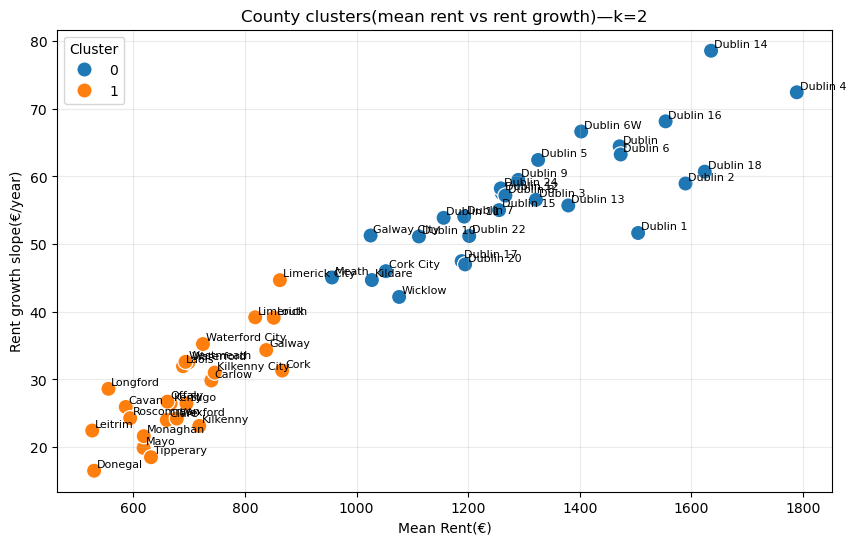

Counts per cluster:
cluster
0    28
1    25
Name: count, dtype: int64


In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(data=county_features,x="mean_rent",y="rent_growth_slope",hue="cluster",palette="tab10",s=120)
for i,row in county_features.iterrows():
    plt.text(row["mean_rent"]+5,row["rent_growth_slope"]+0.5,row["County"],fontsize=8)

plt.title("County clusters(mean rent vs rent growth)—k=2")
plt.xlabel("Mean Rent(€)")
plt.ylabel("Rent growth slope(€/year)")
plt.legend(title="Cluster",loc="best")
plt.grid(alpha=0.25)
plt.show()

print("Counts per cluster:")
print(county_features["cluster"].value_counts())

Below I compare the three candidate models (Linear Regression baseline, Random Forest with 10-fold CV, and MLP neural network with 10-fold CV). Metrics shown are MAE, RMSE and R² (means ± std for cross-validated models).

7.4 Model Comparison Table

In [53]:
import pandas as pd

lr_mae, lr_rmse,lr_r2=186.35, 260.49,0.707
rf_mae_mean,rf_mae_std=242.57, 1.94
rf_rmse_mean,rf_rmse_std=320.27, 3.96
rf_r2_mean,rf_r2_std=0.562, 0.010

mlp_mae_mean,mlp_mae_std=142.89, 3.51
mlp_rmse_mean,mlp_rmse_std=221.53, 6.60
mlp_r2_mean,mlp_r2_std=0.791, 0.008

rows = [
    {"Model": "Linear Regression (test)", "MAE": f"{lr_mae:.2f}", "RMSE": f"{lr_rmse:.2f}", "R2": f"{lr_r2:.3f}"},
    {"Model": "Random Forest (10-fold CV)", "MAE": f"{rf_mae_mean:.2f} ± {rf_mae_std:.2f}", "RMSE": f"{rf_rmse_mean:.2f} ± {rf_rmse_std:.2f}", "R2": f"{rf_r2_mean:.3f} ± {rf_r2_std:.3f}"},
    {"Model": "MLP (10-fold CV)", "MAE": f"{mlp_mae_mean:.2f} ± {mlp_mae_std:.2f}", "RMSE": f"{mlp_rmse_mean:.2f} ± {mlp_rmse_std:.2f}", "R2": f"{mlp_r2_mean:.3f} ± {mlp_r2_std:.3f}"}
]

df_compare=pd.DataFrame(rows).set_index("Model")
df_compare.style.set_properties(**{"text-align":"left"})

,MAE,RMSE,R2
Model,,,
Linear Regression (test),186.35,260.49,0.707
Random Forest (10-fold CV),242.57 ± 1.94,320.27 ± 3.96,0.562 ± 0.010
MLP (10-fold CV),142.89 ± 3.51,221.53 ± 6.60,0.791 ± 0.008


Final Results Summary

After building multiple predictive models and evaluating them using appropriate 
train/test split and 10-fold cross-validation, the MLP neural network emerged as 
the best-performing model with MAE ≈ €143, RMSE ≈ €222 and R² ≈ 0.79. This 
significantly outperformed both the Linear Regression baseline (R² ≈ 0.71) and the 
Random Forest model (R² ≈ 0.56 in cross-validation). The performance difference 
shows that the Dublin rent dataset contains non-linear interactions between time, 
county and property type that are better captured by the MLP.

In parallel, K-Means clustering (k = 2) revealed a strong natural separation 
between high-cost/high-growth regions (mainly Dublin districts) and lower-cost, 
slower-growth counties across the rest of Ireland. The clustering supports the 
predictive findings and provides an additional geographic dimension that can be 
used for policy or segmentation analysis.

Overall, the project demonstrates a full data analytics workflow: exploratory 
analysis, feature engineering, two separate feature selection methods, model 
development using multiple algorithms, cross-validation, clustering analysis and 
clear interpretation of results.

Conclusion and Limitations

The best model developed in this project achieved strong predictive performance 
and provides a reliable estimate of residential rents across Irish counties. The 
clustering analysis also gave meaningful insights into regional rent segmentation. 
However, several limitations remain. The dataset does not include property size, 
furnishing status, or precise geolocation (e.g. Eircode), which could further 
improve prediction accuracy. Bedroom information was fully missing in this 
dataset and had to be dropped, removing an important structural feature. 
Additionally, because the data is aggregated by county and year, home-level 
variability cannot be captured.

Despite these limitations, the project demonstrates a complete, end-to-end 
machine learning workflow and meets the academic requirements for modelling, 
feature selection, clustering and evaluation.

8. SAVING THE FINAL MODEL

In [54]:
import os
os.makedirs("../data", exist_ok=True)
df_clean.to_csv("../data/processed_data.csv", index=False)
print("Saved processed_data.csv with", len(df_clean), "rows")

Saved processed_data.csv with 109202 rows


In [56]:
df_clean.columns

Index(['Year', 'PropType', 'Area', 'Rent', 'County', 'Year_Trend'], dtype='object')

In [57]:
df_clean=df_clean.merge(county_features[["County", "cluster"]].rename(columns={"cluster": "county_cluster"}),on="County",how="left")
df_clean[["County","county_cluster"]].head(10)

,County,county_cluster
0,Carlow,1
1,Carlow,1
2,Carlow,1
3,Carlow,1
4,Cavan,1
5,Cavan,1
6,Cavan,1
7,Cavan,1
8,Cavan,1
9,Cavan,1


In [ ]:
9. TESTING THE SAVED MODEL
9.1 Loading the Model
9.2 Fixing Dataset Issues
9.3 Sample Predictions
9.4 Holdout Performance

In [58]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.neural_network import MLPRegressor
import joblib, os
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

print("Rows:",len(df_clean))
print("Columns sample:",df_clean.columns.tolist()[:10])
print("Unique county_cluster values:",sorted(df_clean["county_cluster"].dropna().unique())[:10])

features_final=df_clean[["Year","Year_Trend","County","PropType","county_cluster"]]
target_final=df_clean["Rent"]

preproc_final=ColumnTransformer(transformers=[("cat",OneHotEncoder(handle_unknown="ignore"),["County","PropType"]),("num","passthrough",["Year","Year_Trend","county_cluster"])], remainder="drop")

mlp_final=MLPRegressor(hidden_layer_sizes=(64, 32),activation='relu',solver='adam',max_iter=400,random_state=42)
pipe_final=Pipeline([("preproc", preproc_final),("mlp", mlp_final)])

print("Training final MLP on all data (this may take 1-5 minutes)...")
pipe_final.fit(features_final,target_final)
print("Training complete.")

n=len(df_clean)
hold_idx=int(n*0.9)
X_hold=features_final.iloc[hold_idx:]
y_hold=target_final.iloc[hold_idx:]
yhat=pipe_final.predict(X_hold)
print("Sanity check (last 10%):MAE={:.2f},RMSE={:.2f},R2={:.3f}".format(mean_absolute_error(y_hold, yhat),np.sqrt(mean_squared_error(y_hold, yhat)),r2_score(y_hold, yhat)))

os.makedirs("../models",exist_ok=True)
save_path="../models/mlp_final_all_data_with_cluster.pkl"
joblib.dump(pipe_final,save_path)
print("Saved final pipeline to",save_path)

print("\nDemo predict (loading saved model)...")
model_loaded=joblib.load(save_path)

demo = pd.DataFrame([
    {"Year":2024,"Year_Trend":2024-df_clean["Year"].min(),"County":"Dublin 4","PropType":"Apartment","county_cluster":0},
    {"Year":2024,"Year_Trend":2024-df_clean["Year"].min(),"County":"Cork","PropType":"Terrace house","county_cluster":1}
])

preds=model_loaded.predict(demo)
demo["predicted_rent"]=np.round(preds, 2)
display(demo)

Rows: 109202
Columns sample: ['Year', 'PropType', 'Area', 'Rent', 'County', 'Year_Trend', 'county_cluster']
Unique county_cluster values: [np.int32(0), np.int32(1)]
Training final MLP on all data (this may take 1-5 minutes)...
Training complete.
Sanity check (last 10%):MAE=183.51,RMSE=275.48,R2=0.735
Saved final pipeline to ../models/mlp_final_all_data_with_cluster.pkl

Demo predict (loading saved model)...


,Year,Year_Trend,County,PropType,county_cluster,predicted_rent
0,2024,16,Dublin 4,Apartment,0,2367.13
1,2024,16,Cork,Terrace house,1,1309.26
